In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [33]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')

In [3]:
data.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [5]:
data.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

All features are categorical but the predicted value is going to be continious

the seat number will not be important to the target so it can be dropped

we also have quite a few nulls in most columns that need to be treated

In [34]:
for i in data.columns:
  null_col = data[i].isnull().sum()
  if null_col> 0:
    data[i].bfill(inplace=True)

In [35]:
data.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [39]:
data.drop('Seat No.', axis = 1, inplace = True)

In [42]:
data.replace('WU','F', inplace=True)

In [43]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
F       3
Name: PH-121, dtype: int64


A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64


A     177
A-    120
B+     50
B      49
B-     43
D      31
A+     31
C      19
C+     17
C-     16
D+     14
F       4
Name: CY-105, dtype: int64


A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    35
A+    34
F      3
Name: HS-105/12, dtype: int64


A-    105
A     100
B-     70
B+     62
B      55
C-     40
C+     33
C      30
D      26
A+     24
D+     21
F       5
Name: MT-111, dtype: int64


A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-     22
D+     15
D      12
Name: CS-105, dtype: int64


A-    116
B+    101
B      97
A      56
B-     54
C+     41
D+     29
C-     27
D      25
C      18
A+      4
F       3
Name: CS-106, dty

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le = LabelEncoder()
for i in data.columns:
  if data[i].dtype == 'object':
    data[i] = le.fit_transform(data[i])

In [47]:
data

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,2,2,0,0,0,4,4,3,0,3.798
567,1,0,0,0,0,0,0,2,0,0,...,4,4,0,0,2,3,2,6,2,3.772
568,3,0,2,4,0,0,0,0,0,3,...,2,3,0,4,0,6,4,2,2,3.470
569,0,4,9,0,9,10,5,8,5,8,...,9,3,3,8,9,6,3,5,6,2.193


In [48]:
data.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.777583,5.071804,2.901926,4.255692,3.900175,2.838879,4.133100,3.956217,3.894921,4.795096,...,4.141856,4.835377,3.532399,5.446585,3.253940,2.464098,3.910683,4.019264,3.302977,2.954888
std,3.037991,2.785317,2.948240,3.196673,2.980436,2.696709,2.722835,3.017465,2.663494,3.145319,...,3.366895,2.788613,2.997704,2.751434,2.594251,2.499829,2.421557,2.835486,2.393920,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,3.000000,3.000000,5.000000,...,4.000000,5.000000,3.000000,5.000000,3.000000,2.000000,4.000000,4.000000,3.000000,3.029000
75%,6.000000,7.000000,5.000000,7.000000,6.000000,4.000000,5.500000,6.000000,6.000000,8.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.451000
max,11.000000,11.000000,11.000000,11.000000,11.000000,10.000000,11.000000,11.000000,11.000000,11.000000,...,12.000000,11.000000,10.000000,12.000000,12.000000,12.000000,11.000000,11.000000,12.000000,3.985000


<Axes: >

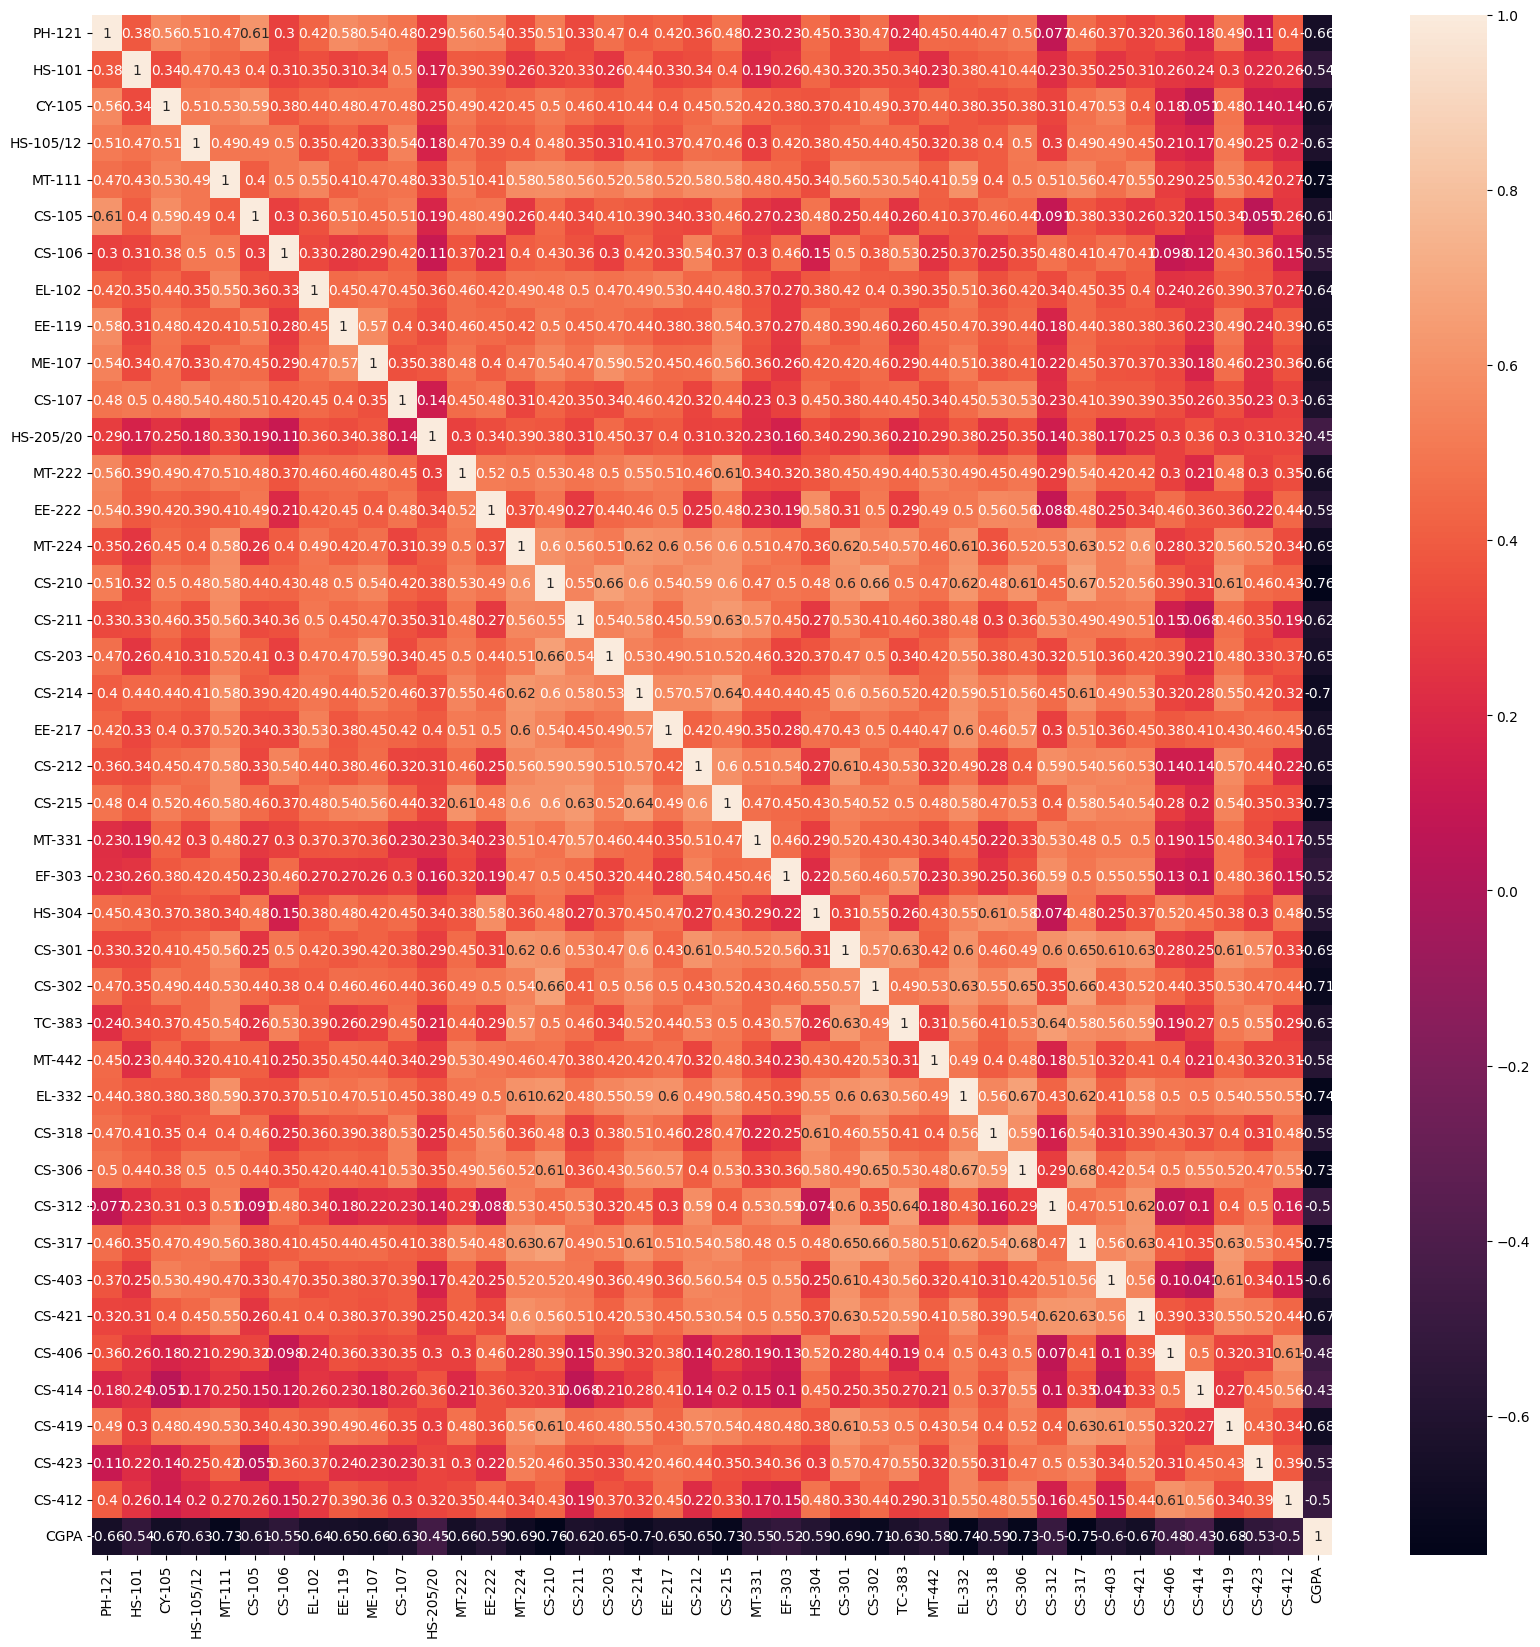

In [54]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot = True)

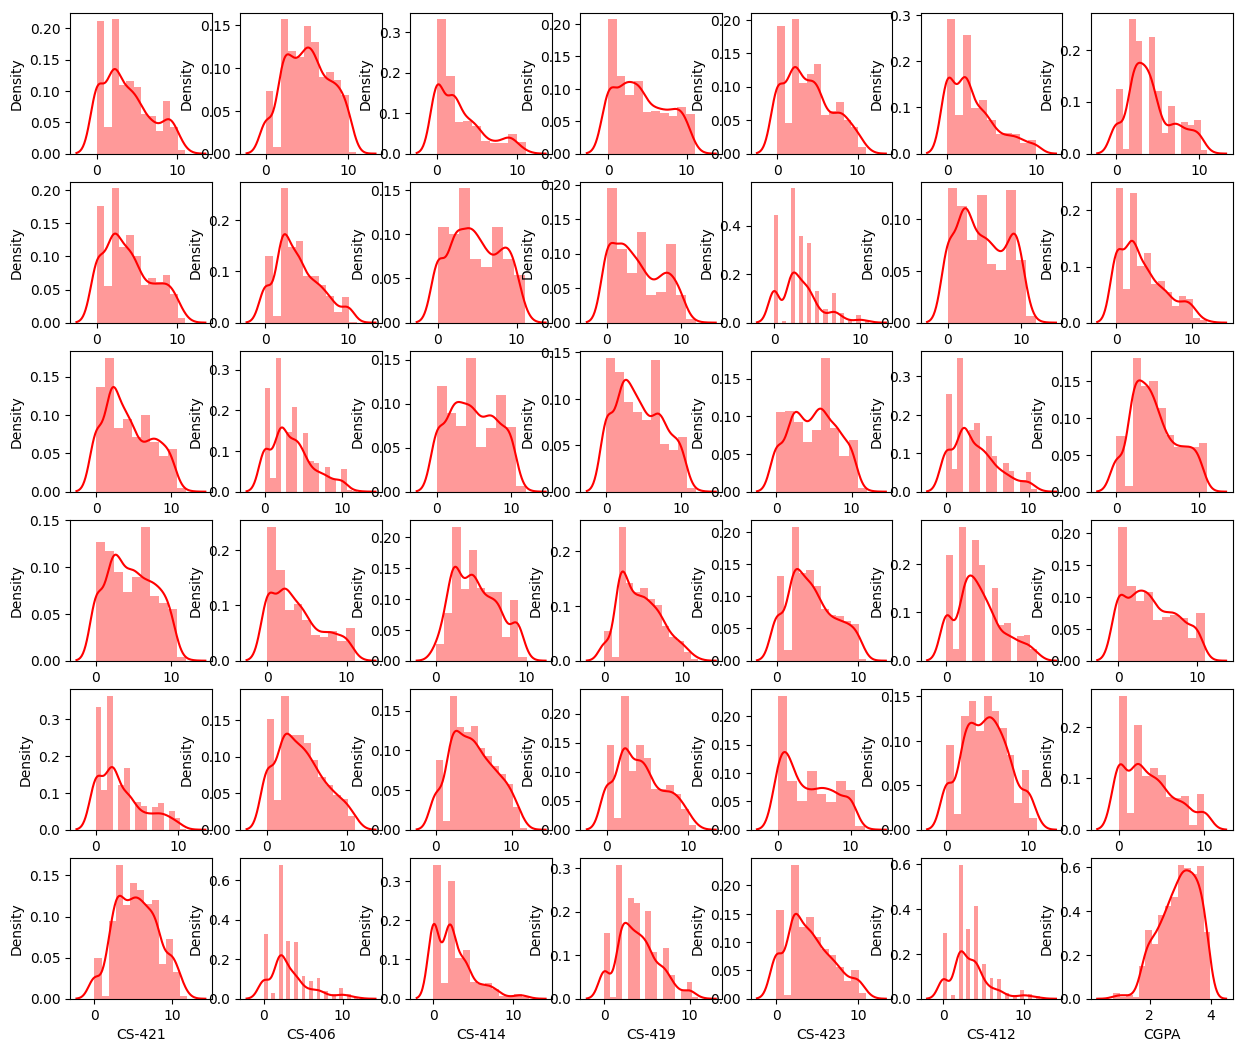

In [55]:
plt.figure(figsize = (15,15))
plotnumber = 1
for col in data.columns:
    if plotnumber<=42:
        ax = plt.subplot(7,7,plotnumber)
        sns.distplot(data[col], color='r')
        plt.xlabel(col)
        plotnumber +=1

In [56]:
data.skew()

PH-121       0.534939
HS-101       0.053303
CY-105       0.951658
HS-105/12    0.309496
MT-111       0.454575
CS-105       0.930769
CS-106       0.614443
EL-102       0.479237
EE-119       0.566625
ME-107       0.094050
CS-107       0.385185
HS-205/20    0.866082
MT-222       0.168294
EE-222       0.752960
MT-224       0.388912
CS-210       0.679127
CS-211       0.089922
CS-203       0.259381
CS-214       0.021430
EE-217       0.698319
CS-212       0.401489
CS-215       0.136534
MT-331       0.605897
EF-303       0.339198
HS-304       0.462997
CS-301       0.374831
CS-302       0.556964
TC-383       0.308948
MT-442       0.857467
EL-332       0.417887
CS-318       0.235168
CS-306       0.388343
CS-312       0.404610
CS-317       0.124998
CS-403       0.584197
CS-421       0.123989
CS-406       1.114147
CS-414       1.251691
CS-419       0.472256
CS-423       0.483140
CS-412       1.065892
CGPA        -0.497203
dtype: float64

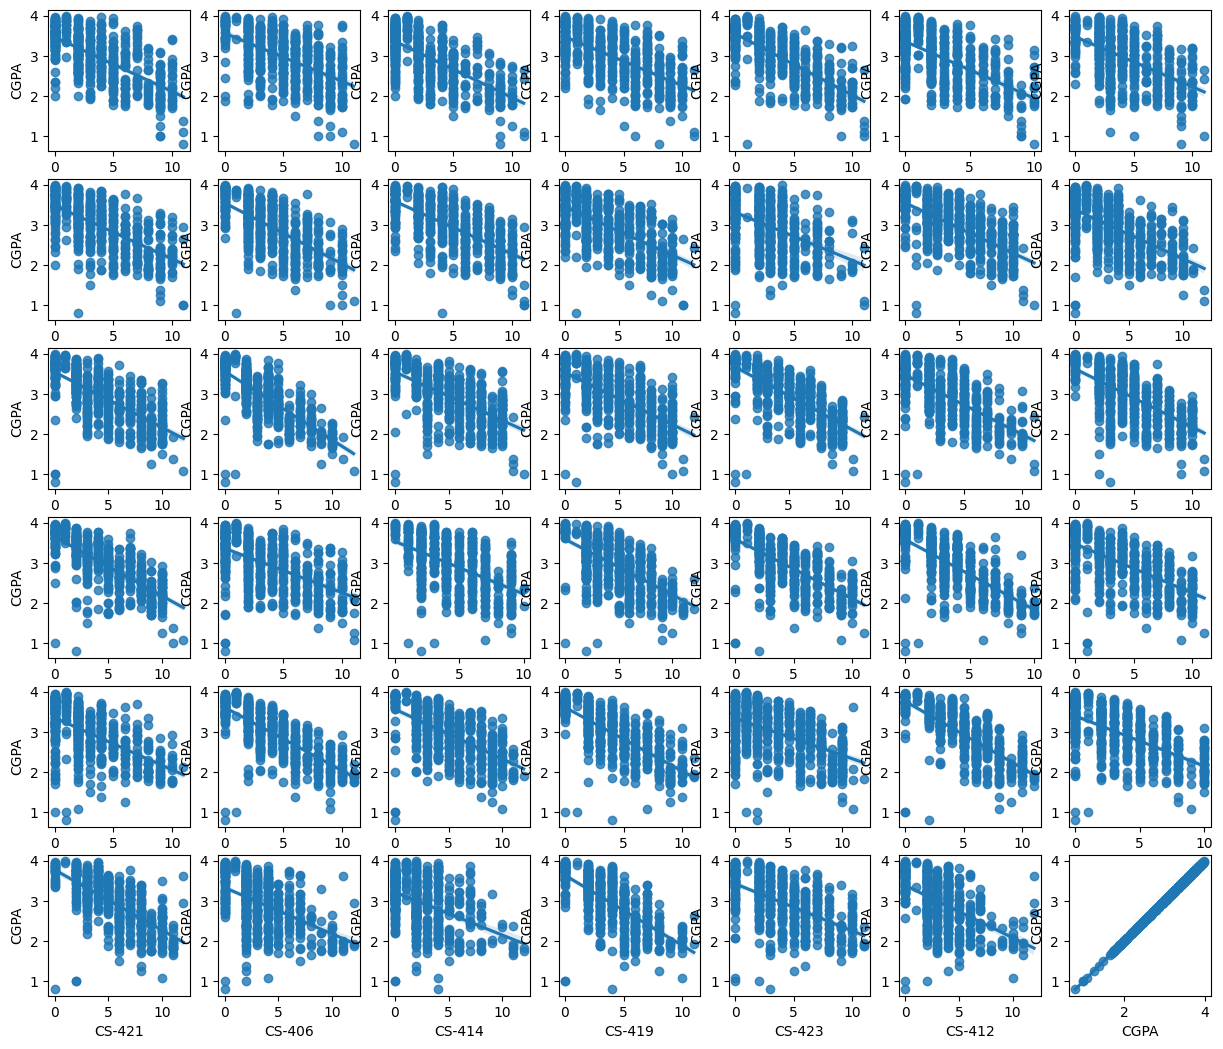

In [57]:
plt.figure(figsize = (15,15))
plotnumber = 1
for col in data.columns:
    if plotnumber<=42:
        ax = plt.subplot(7,7,plotnumber)
        sns.regplot(x = col , y = 'CGPA' , data=data)
        plt.xlabel(col)
        plt.ylabel('CGPA')
        plotnumber +=1

In [58]:
x = data.drop('CGPA', axis=1)
y = data['CGPA']

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor as KNN

In [60]:
MaxAccu = 0
MaxRS = 0
for i in range(1,300):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
  LR = LinearRegression()
  LR.fit(x_train,y_train)
  pred = LR.predict(x_test)
  acc = r2_score(y_test,pred)
  if acc > MaxAccu:
    MaxAccu = acc
    MaxRS = i
print('MAximum Score:',MaxAccu,'\n', 'Best Random State:',MaxRS)

MAximum Score: 0.9681154336608795 
 Best Random State: 168


In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=MaxRS)

**Linear Regression**

In [62]:
LR = LinearRegression()
LR.fit(x_train,y_train)
LRpred = LR.predict(x_test)
LR_trainpred = LR.predict(x_train)
print('R2_score:', r2_score(y_test,LRpred))
print('R2_score for training data:', r2_score(y_train,LR_trainpred))
print('MAE:', mean_absolute_error(y_test, LRpred))
print('MSE:', mean_squared_error(y_test, LRpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, LRpred)))

R2_score: 0.9681154336608795
R2_score for training data: 0.9177091986714334
MAE: 0.08534349338902371
MSE: 0.011588999790880307
RMSE: 0.2921360871050061


**Random Forest**

In [63]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
RFRpred = RFR.predict(x_test)
RFR_trainpred = RFR.predict(x_train)
print('R2_score:', r2_score(y_test,RFRpred))
print('R2_score for training data:', r2_score(y_train,RFR_trainpred))
print('MAE:', mean_absolute_error(y_test, RFRpred))
print('MSE:', mean_squared_error(y_test, RFRpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, RFRpred)))

R2_score: 0.9575200223234188
R2_score for training data: 0.9800699603691955
MAE: 0.09128052325581378
MSE: 0.015440086190116229
RMSE: 0.3021266675681142


**KNN**

In [64]:
knn = KNN()
knn.fit(x_train,y_train)
knnpred = knn.predict(x_test)
knn_trainpred = knn.predict(x_train)
print('R2_score:', r2_score(y_test,knnpred))
print('R2_score for training data:', r2_score(y_train,knn_trainpred))
print('MAE:', mean_absolute_error(y_test, knnpred))
print('MSE:', mean_squared_error(y_test, knnpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, knnpred)))

R2_score: 0.9490990712634402
R2_score for training data: 0.9220697928913331
MAE: 0.09859883720930235
MSE: 0.01850082720930233
RMSE: 0.3140045178167065


**Gradient Boosting**

In [65]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
GBRpred = GBR.predict(x_test)
GBR_trainpred = GBR.predict(x_train)
print('R2_score:', r2_score(y_test,GBRpred))
print('R2_score for training data:', r2_score(y_train,GBR_trainpred))
print('MAE:', mean_absolute_error(y_test, GBRpred))
print('MSE:', mean_squared_error(y_test, GBRpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, GBRpred)))

R2_score: 0.969505905959809
R2_score for training data: 0.9974205575244081
MAE: 0.07506172145408706
MSE: 0.011083608467375052
RMSE: 0.27397394302029354


**Cross Validation**


In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
score = cross_val_score(LR, x, y)
print(score)
print(score.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,LRpred)-score.mean())

[0.94818438 0.88044804 0.89845347 0.9603779  0.84122137]
0.9057370303490343
Difference Between score mean and R2score: 0.06237840331184519


In [68]:
score1 = cross_val_score(RFR, x, y)
print(score1)
print(score1.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,RFRpred)-score1.mean())

[0.93405258 0.85423848 0.92228012 0.94080175 0.77012166]
0.8842989168723069
Difference Between score mean and R2score: 0.07322110545111193


In [69]:
score2 = cross_val_score(knn, x, y)
print(score2)
print(score2.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,knnpred)-score2.mean())

[0.9677016  0.85791137 0.87554151 0.95568802 0.78763587]
0.8888956732504066
Difference Between score mean and R2score: 0.06020339801303354


In [70]:
score3 = cross_val_score(GBR, x, y)
print(score3)
print(score3.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,GBRpred)-score3.mean())

[0.95288849 0.94839318 0.93971726 0.94651985 0.83655562]
0.9248148805127092
Difference Between score mean and R2score: 0.0446910254470998


Text(0.5, 1.0, 'Gradient Boosting')

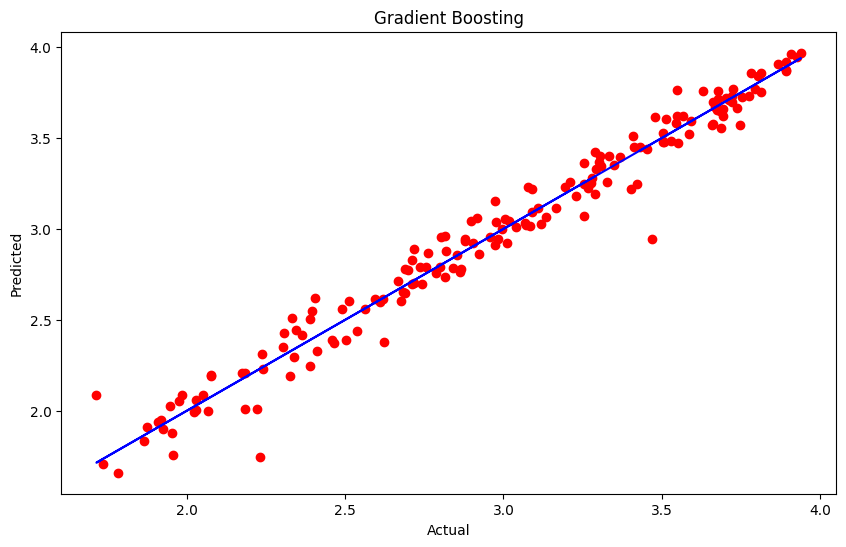

In [71]:
plt.figure(figsize=(10,6))
plt.scatter(x=GBRpred,y=y_test,color='r')
plt.plot(GBRpred,GBRpred, color='b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting')

**Hyperparameter Tuning**

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
param = {'loss':['squared_error', 'absolute_error', 'huber', 'quantile'], 'criterion': ['friedman_mse', 'squared_error'], 'learning_rate':[0.01,0.05,0.08,0.1,0.2], 'n_estimators':[100,200,300]}
gscv = GridSearchCV(GBR,param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.05, 0.08, 0.1, 0.2],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'n_estimators': [100, 200, 300]})

In [74]:
gscv.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'loss': 'absolute_error',
 'n_estimators': 200}

In [75]:
model = GradientBoostingRegressor(criterion= 'squared_error', learning_rate= 0.1, loss= 'absolute_error', n_estimators= 200)
model.fit(x_train,y_train)
pred = model.predict(x_test)
print('R2_score:', r2_score(y_test,pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, pred)))

R2_score: 0.9663589723337623
MAE: 0.08358674193875153
MSE: 0.012227416187583044
RMSE: 0.2891137180051329


In [76]:
df = pd.DataFrame()
actual = np.array(y_test)
df['Actual'] = actual
df['Prediction'] = pred

In [77]:
df

,Actual,Prediction
0,3.424,3.364167
1,3.193,3.275318
2,3.029,3.134060
3,3.479,3.546453
4,2.442,2.492032
...,...,...
167,1.658,1.908710
168,3.727,3.701082
169,3.621,3.542534
170,2.228,2.407237


In [78]:
import joblib

In [80]:
joblib.dump(model,'student_grade.pk1')

['student_grade.pk1']